In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
Sequential = tf.keras.models.Sequential
Dense = tf.keras.layers.Dense

(X_train, Y_train),(X_test, Y_test) = datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 34s 0us/step


In [4]:
print("Training set shape: ", X_train.shape)
print("Test set shape: ", X_test.shape)

Training set shape:  (50000, 32, 32, 3)
Test set shape:  (10000, 32, 32, 3)


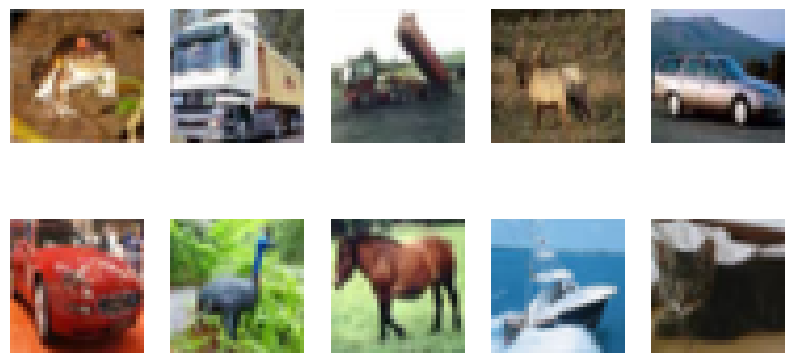

In [5]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
plt.show()

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
model = Sequential([layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
                    layers.MaxPooling2D((2,2)),
                    layers.Conv2D(64,(3,3), activation='relu'),
                    layers.MaxPooling2D((2,2)),
                    layers.Conv2D(64, (3,3), activation='relu'),
                    layers.Flatten(),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(10, activation='softmax')])


In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(X_train,Y_train, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.1010 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.0952 - loss: 2.3029 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.0983 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.0962 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.0996 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.1009 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.1014 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.1010 -

In [13]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test accuracy: {accuracy * 100:.2f}%") 

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1001 - loss: 2.3026
Test accuracy: 10.00%


In [14]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis = 1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


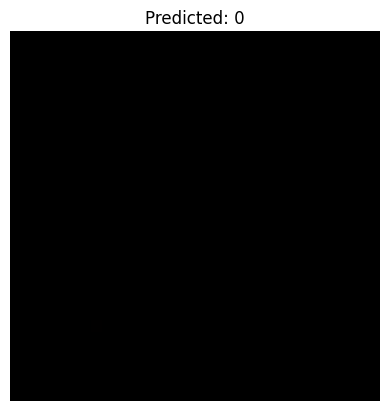

In [16]:
index = 0
plt.imshow(X_test[index]) 
plt.title(f"Predicted: {predicted_labels[index]}") 
plt.axis('off') 
plt.show() 